In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import missingno as msno
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping
%matplotlib inline

# warning
import warnings
warnings.filterwarnings('ignore')

In [154]:
df = pd.read_csv(r'milknew.csv')

In [155]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [156]:
profile = ProfileReport(df, title="Profiling Report")

In [157]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# DATA UNDERSTATING

### Milk Quality Prediction (Classification)

* **This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk.**
* **This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.**
* **Generally, the Grade or Quality of the milk depends on these parameters. These parameters play a vital role in the predictive analysis of the milk.**

#### Usage
* The target variable is nothing but the Grade of the milk. It can be Target
* Low (Bad)
* Medium (Moderate)
* High (Good)

* If Taste, Odor, Fat, and Turbidity are satisfied with optimal conditions then they will assign 1 otherwise 0.
* Temperature and ph are given their actual values in the dataset.

* We have to perform data preprocessing, and data augmentation techniques to build statistical and predictive models to predict the quality of the milk.


<Axes: >

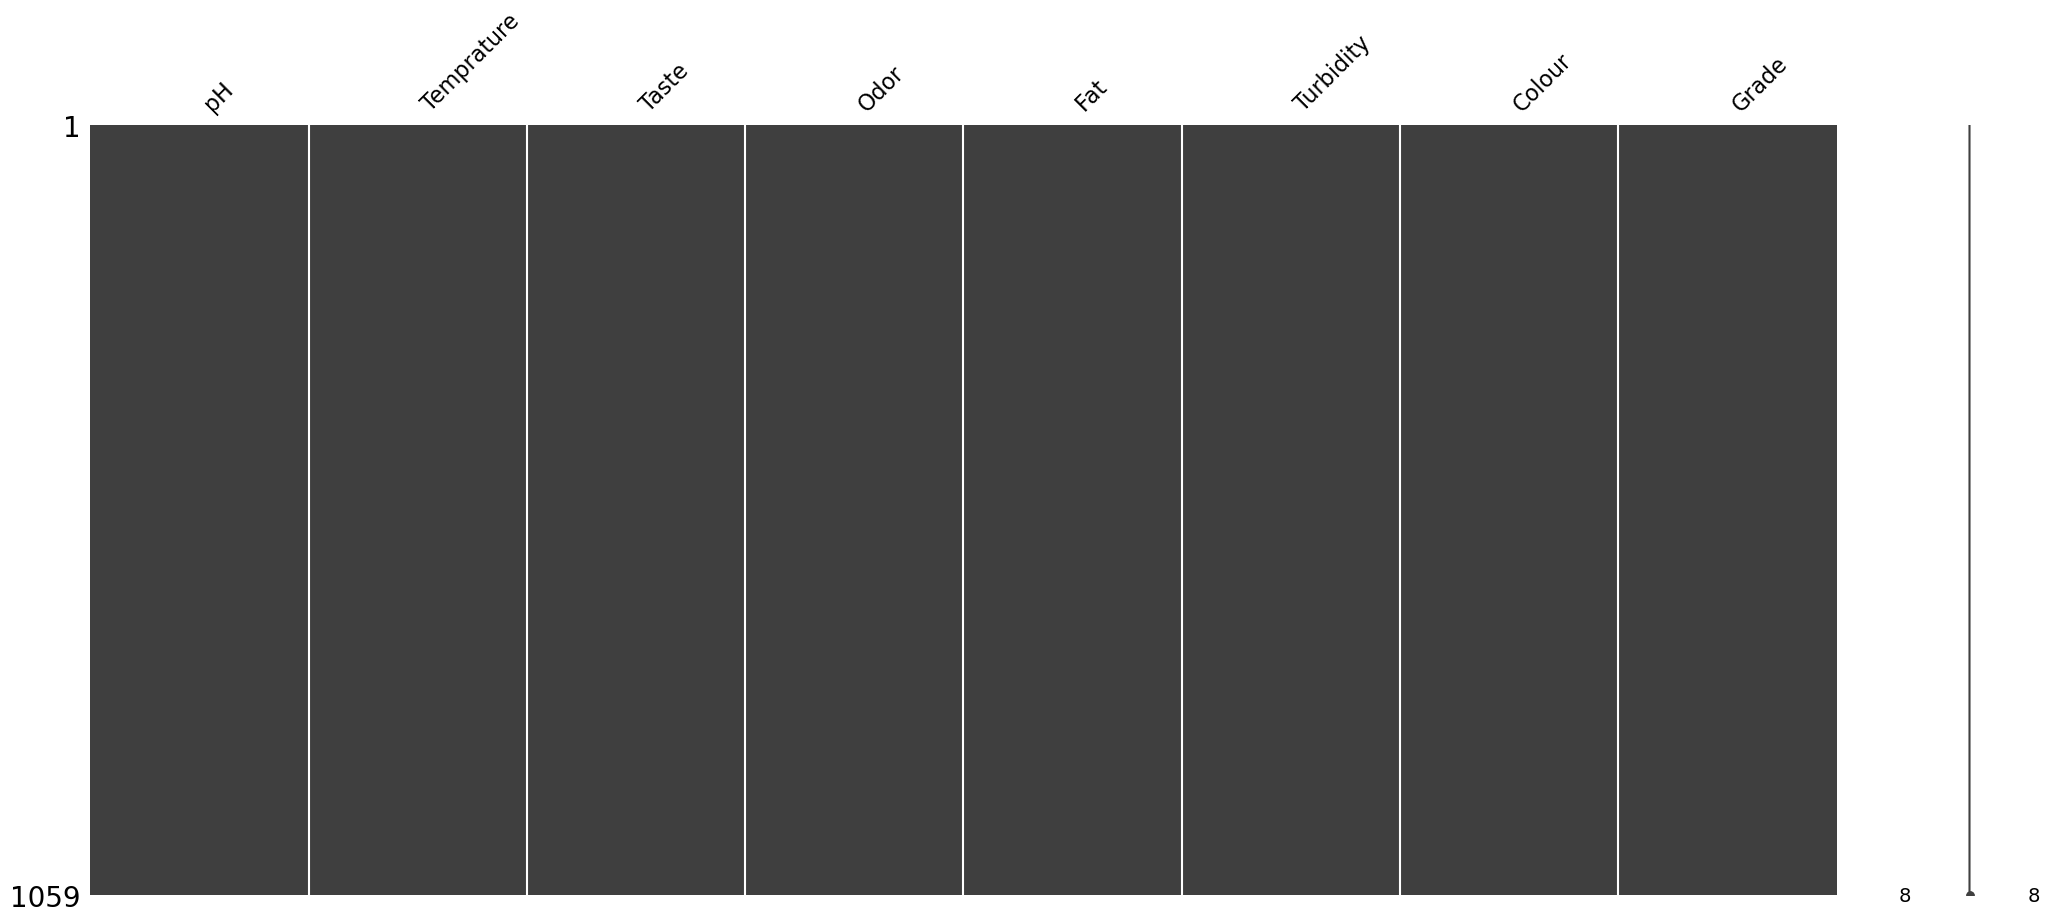

In [158]:
msno.matrix(df)

From Above Missingno plot we clearly say that there is no mising values in our DataSet

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [160]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,1059.0,6.630123,1.399679,3.0,6.5,6.7,6.8,9.5
Temprature,1059.0,44.226629,10.098364,34.0,38.0,41.0,45.0,90.0
Taste,1059.0,0.546742,0.498046,0.0,0.0,1.0,1.0,1.0
Odor,1059.0,0.432483,0.495655,0.0,0.0,0.0,1.0,1.0
Fat,1059.0,0.671388,0.469930,0.0,0.0,1.0,1.0,1.0
Turbidity,1059.0,0.491029,0.500156,0.0,0.0,0.0,1.0,1.0
Colour,1059.0,251.840415,4.307424,240.0,250.0,255.0,255.0,255.0


In [161]:
df.rename(columns={'Fat ':'Fat'},inplace=True)

In [162]:
num_col_df = ['pH','Temprature','Colour']
cat_col_df = ['Taste','Odor','Fat','Turbidity']

In [163]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

## Target column visuvalization

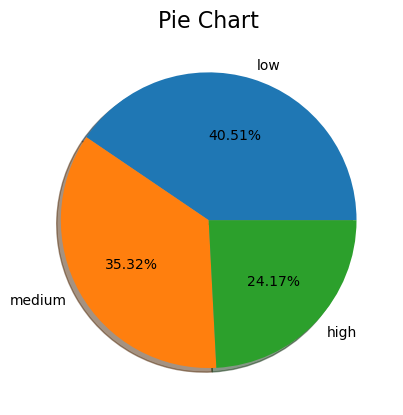

In [164]:
Grade_counts = df['Grade'].value_counts()
plt.pie(Grade_counts, labels=Grade_counts.index,shadow=True, autopct='%1.2f%%')
plt.title("Pie Chart", fontsize=16)
plt.show()

### Target data class is show imbalance data between churners and not-churners
* `Grade - Whether the milk grade will be Low (Bad) or Medium (Moderate) or High (Good)`
    * **There are 40.51% are Low, 35.32% are Medium and 24.17% High**

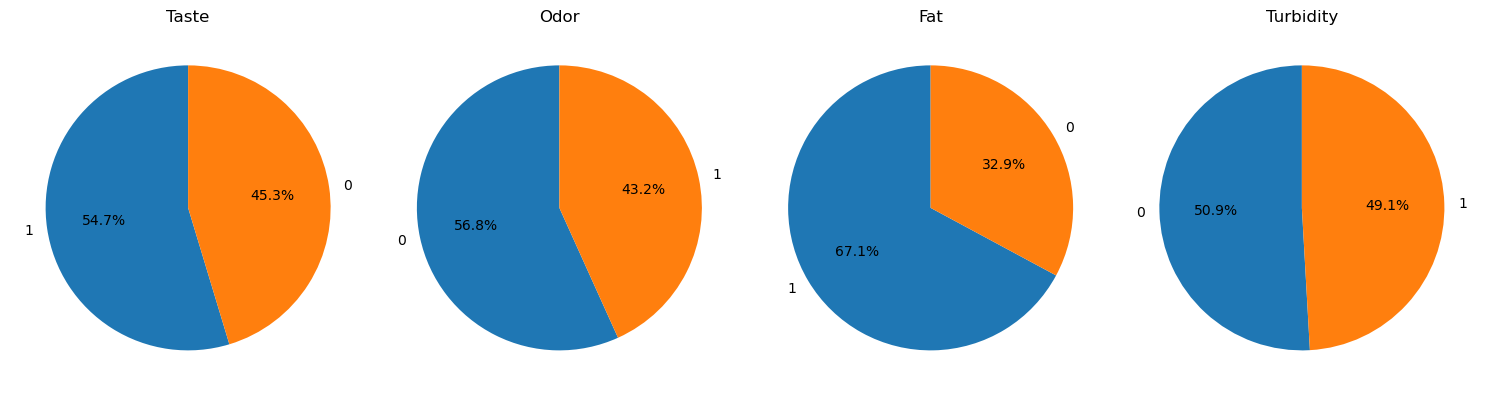

In [165]:
cat_col_count = [df[cat_col].value_counts() for cat_col in cat_col_df]
fig, axes = plt.subplots(1, 4, figsize=(15,12))
for i, (service, counts) in enumerate(zip(cat_col_df, cat_col_count)):
    ax = axes[i]  
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(service)
    
plt.tight_layout()
plt.show()

- If Taste, Odor, Fat, and Turbidity are satisfied under optimal conditions, they will be assigned a value of 1; otherwise, it will be 0.
- The satisfaction rate for Taste under optimal conditions is 54.7%.
- Odor, on the other hand, is only half as likely to be satisfied with optimal conditions.
- Fat has a satisfaction rate of 67.1% under optimal conditions.
- Turbidity shows an equal distribution, with 50.9% satisfied and 49.1% not satisfied under optimal conditions.


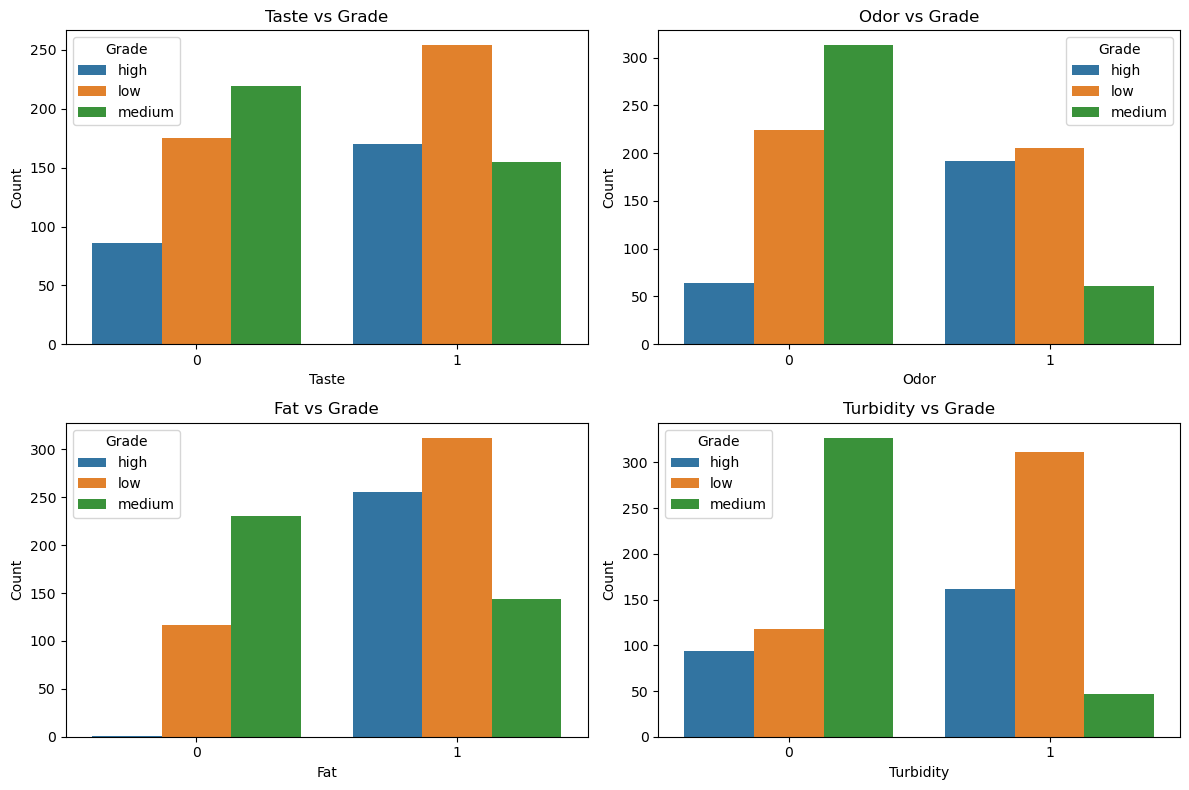

In [166]:
plt.figure(figsize=(12, 8))
for i, cat_col in enumerate(cat_col_df, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=cat_col, hue="Grade")
    plt.title(f"{cat_col} vs Grade")
    plt.xlabel(cat_col)
    plt.ylabel("Count")
    plt.legend(title="Grade")
plt.tight_layout()
plt.show()

- When Taste, Odor, Fat, and Turbidity are all satisfied under optimal conditions, the likelihood of receiving a HIGH grade is higher compared to when they are not satisfied.
- Conversely, when all four factors are not satisfied, the likelihood of receiving a LOW grade is higher.
- The MEDIUM grade tends to be more evenly distributed in the case of Odor, while in other cases, satisfaction leads to a higher likelihood of receiving a MEDIUM grade.



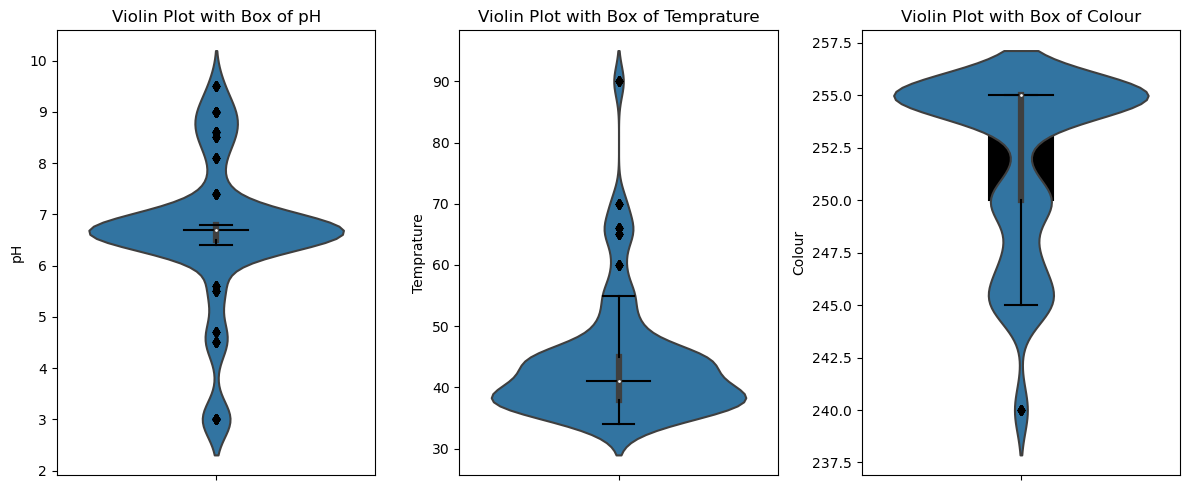

In [167]:
plt.figure(figsize=(12, 5))
for i, value in enumerate(num_col_df, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(data=df, y=value)
    sns.boxplot(data=df, y=value, width=0.2, linewidth=1.5, color='black', fliersize=5)
    plt.title(f"Violin Plot with Box of {value}")
    plt.ylabel(value)
plt.tight_layout()
plt.show()

- The spread of pH values is between 3 and 9.5, with a concentration between 6 and 7. Some outliers are present in the data.
- The temperature values range from 34 to 90, with a higher concentration between 34 and 50 and some outliers present in the data.
- The spread of Color values ranges from 242 to 255, with a higher concentration at 255, a medium spread between 245 and 252, and some outliers present in the data.


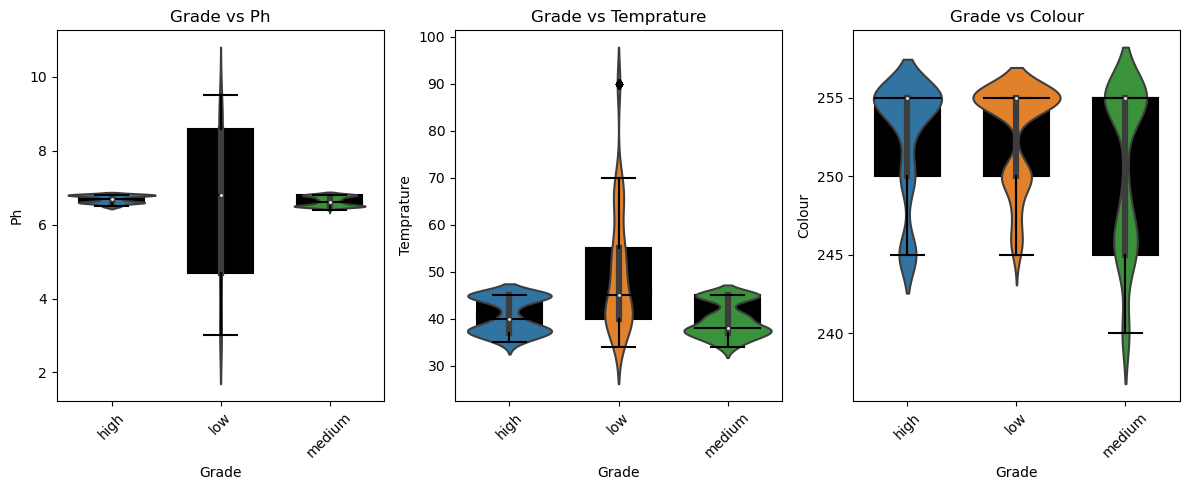

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,5))

# Plotting violin plots and box plots for each grade separately
for i, col in enumerate(num_col_df):
    ax = axes[i]
    
    sns.violinplot(data=df, y=col, x='Grade', ax=ax)
    sns.boxplot(data=df, y=col, x='Grade', width=0.6, linewidth=1.5, color='black', fliersize=5, ax=ax)
    
    ax.set_title(f"Grade vs {col.capitalize()}")
    ax.set_ylabel(col.capitalize())
    ax.set_xlabel('Grade')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()



- For a HIGH grade, pH values are in the range of 6.5 to 6.8, temperature values are between 35 and 45, and Color values are in the range of 245 to 255.
- For a LOW grade, pH values are in the range of 3 to 9.5, temperature values are between 34 and 90, and Color values are in the range of 245 to 255.
- For a MEDIUM grade, pH values are in the range of 6.4 to 6.8, temperature values are between 34 and 45, and Color values are in the range of 240 to 255.


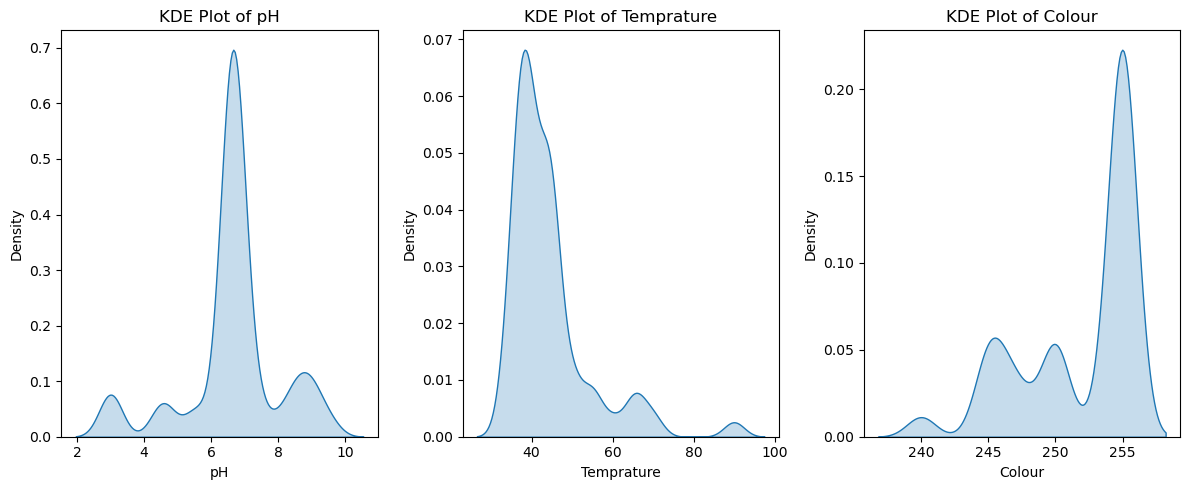

In [169]:
plt.figure(figsize=(12, 5))
for i, value in enumerate(num_col_df, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(data=df, x=value,shade=True)
    plt.title(f"KDE Plot of {value}")
    plt.xlabel(value)
    plt.ylabel("Density")
plt.tight_layout()
plt.show()

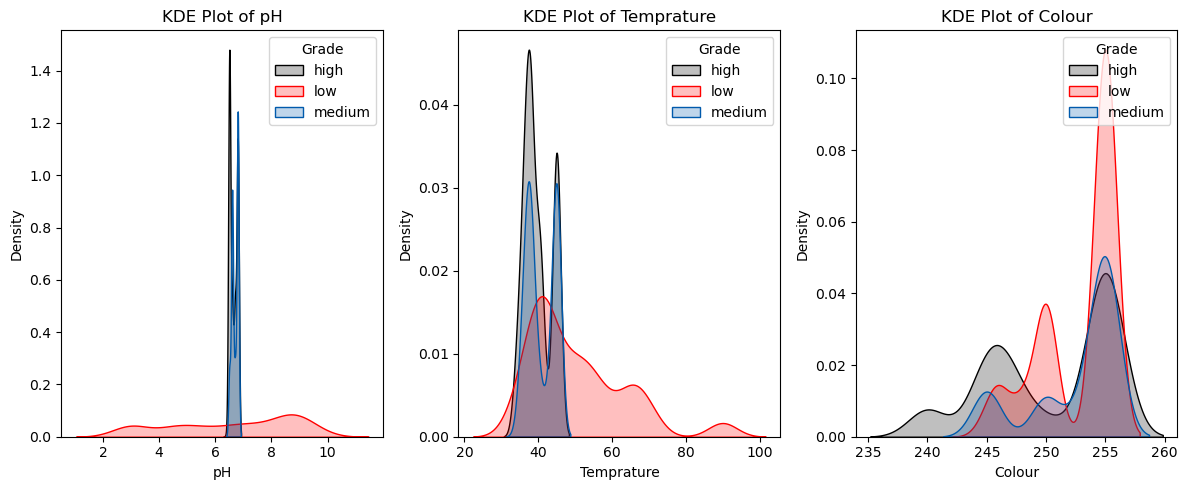

In [170]:
plt.figure(figsize=(12, 5))
custom_palette = ['#005aac','#Ff0000','#000000']
for i, value in enumerate(num_col_df, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(data=df, x=value,palette=custom_palette,hue="Grade", shade=True)
    plt.title(f"KDE Plot of {value}")
    plt.xlabel(value)
    plt.ylabel("Density")
    plt.legend(title="Grade", labels=['high','low','medium'])

plt.tight_layout()
plt.show()


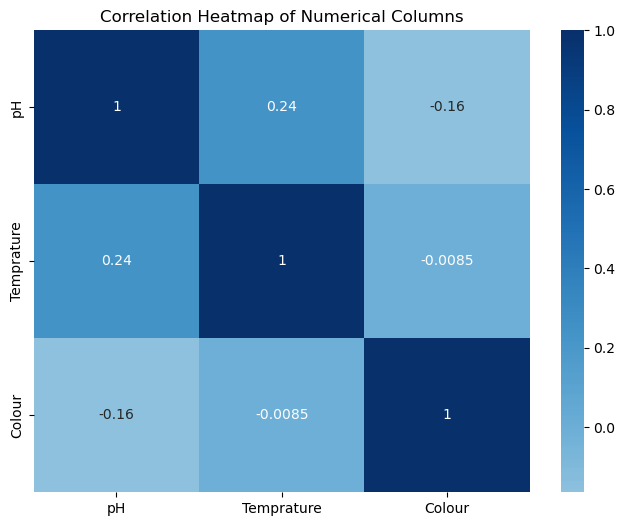

In [171]:
correlation_matrix = df[num_col_df].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", center=0)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

- There is a negative correlation between Temperature and Color, with a coefficient of -0.0085, and also between pH and Color with a coefficient of -0.16.
- There is a positive correlation between pH and Temperature, with a coefficient of 0.24.

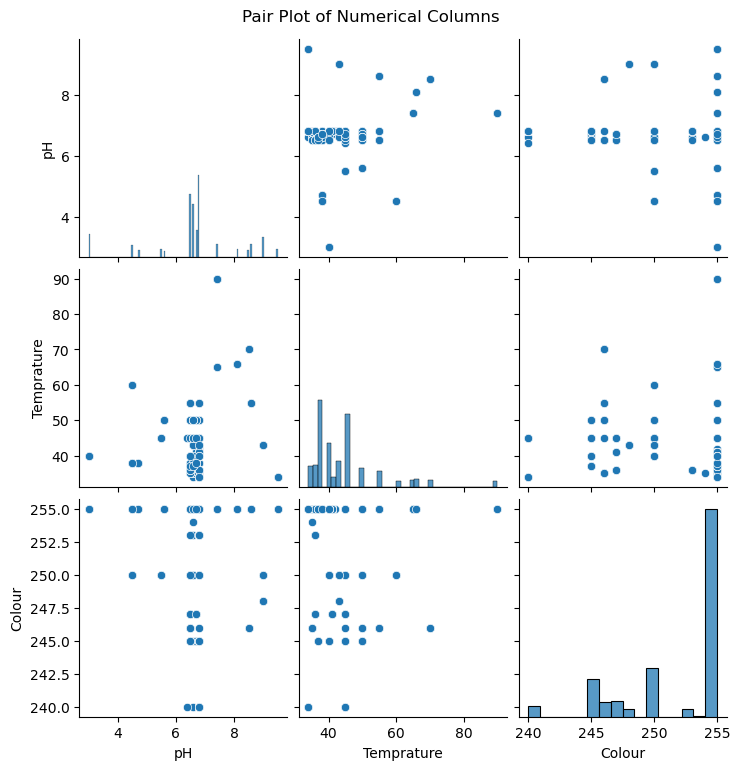

In [172]:
sns.pairplot(df[num_col_df])
plt.suptitle("Pair Plot of Numerical Columns", y=1.02)
plt.show()

## Conclusion About the Understanding The Data After Doing DataAnalysis
The data indicates that satisfaction levels with Taste, Odor, Fat, and Turbidity under optimal conditions play a significant role in determining the grade assigned. When all these factors are satisfied, there is a higher likelihood of receiving a HIGH grade, while when they are not satisfied, the likelihood of receiving a LOW grade increases. The MEDIUM grade tends to be more evenly distributed, particularly in the case of Odor.

Additionally, the pH values are spread between 3 and 9.5, with a concentration between 6 and 7, and some outliers present. Temperature values range from 34 to 90, with a higher concentration between 34 and 50, and Color values range from 242 to 255, with a higher concentration at 255, medium spread between 245 and 252, and some outliers.

For specific grade categories, there are defined ranges for pH, temperature, and Color values. Notably, there is a negative correlation between Temperature and Color, as well as between pH and Color. On the other hand, there is a positive correlation between pH and Temperature.

In conclusion, maintaining optimal conditions for Taste, Odor, Fat, and Turbidity is crucial for achieving higher grades, and specific ranges for pH, temperature, and Color values are associated with different grades. Understanding and monitoring these factors can contribute to maintaining water quality within desired standards.

## Preprocessing the Data

In [173]:
label_encoder = LabelEncoder()

In [174]:
df['Grade'] = label_encoder.fit_transform(df['Grade'])

In [175]:
xtrain, xtest, Ytrain, Ytest = train_test_split(df.drop(columns = ['Grade']),
                                                    df['Grade'],
                                                    test_size=0.2,
                                                    random_state=100)

In [176]:
xtrain.shape, xtest.shape, Ytrain.shape, Ytest.shape

((847, 7), (212, 7), (847,), (212,))

In [177]:
cont_cols = ['pH', 'Temprature', 'Colour']
cat_cols = ['Taste', 'Odor', 'Fat', 'Turbidity']

In [178]:
num_pipeline = Pipeline(steps = [
    
    ('numerical_encoder' , StandardScaler())
])

In [179]:
pre_col_Transformer = ColumnTransformer(transformers = [
    
    ('num_pipeline' , num_pipeline , cont_cols),
    
],remainder='passthrough')

In [180]:
pre_col_Transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_pipeline',
                                 Pipeline(steps=[('numerical_encoder',
                                                  StandardScaler())]),
                                 ['pH', 'Temprature', 'Colour'])])

In [181]:
final_pipeline = Pipeline(steps = [
    
    ('pre_col_Transformer' , pre_col_Transformer)
])

In [182]:
xtrain_pre = final_pipeline.fit_transform(xtrain)

In [183]:
xtest_pre = pd.DataFrame(final_pipeline.transform(xtest))

In [184]:
df.shape

(1059, 8)

## Building The ANN  Architecture.

In [185]:
model = Sequential()
model.add(Dense(units=20,input_dim=7,activation='relu',name='1st_hidden'))
model.add(Dense(units=10,activation='relu',name ='2st_hidden'))
model.add(Dense(units=6,activation='relu',name = '3nd_hidden'))
model.add(Dense(units=3,activation='softmax',name = 'Output_layer'))
model.compile(optimizer='rmsprop',loss=['SparseCategoricalCrossentropy'],metrics=['accuracy'])

In [186]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_hidden (Dense)          (None, 20)                160       
                                                                 
 2st_hidden (Dense)          (None, 10)                210       
                                                                 
 3nd_hidden (Dense)          (None, 6)                 66        
                                                                 
 Output_layer (Dense)        (None, 3)                 21        
                                                                 
Total params: 457 (1.79 KB)
Trainable params: 457 (1.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


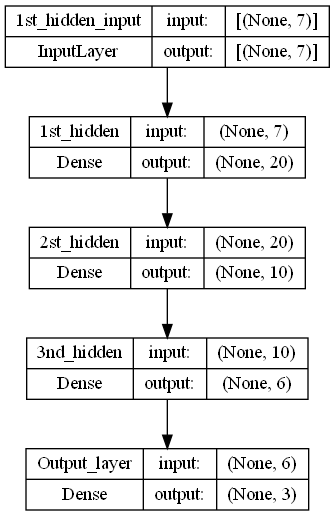

In [187]:
plot_model(model,show_shapes=True)

In [188]:
modelCheckpoint = ModelCheckpoint(r'C:\Users\kalag\OneDrive\Pictures\New folder\model{epoch}.h5',monitor='val_loss',verbose=1,save_best_only=True)

In [189]:
csvLogger = CSVLogger(r'C:\Users\kalag\OneDrive\Pictures\New folder\logs.csv')

In [190]:
tensorBoard = TensorBoard(log_dir=r'C:\Users\kalag\OneDrive\Pictures\tensorboard\logdir',histogram_freq=1)

In [191]:
earlystopping = EarlyStopping(monitor='val_loss',patience=3,start_from_epoch=3,min_delta=0.01,verbose=1)

In [192]:
# fitting the model
trined_model = model.fit(xtrain_pre,Ytrain,validation_split=0.15,batch_size=32,
                         epochs=20,callbacks=[earlystopping,modelCheckpoint,csvLogger,tensorBoard])

Epoch 1/20
15/23 [==================>...........] - ETA: 0s - loss: 1.0622 - accuracy: 0.2792 
Epoch 1: val_loss improved from inf to 1.04868, saving model to C:\Users\kalag\OneDrive\Pictures\New folder\model1.h5
23/23 [==============================] - 2s 30ms/step - loss: 1.0532 - accuracy: 0.2990 - val_loss: 1.0487 - val_accuracy: 0.3203
Epoch 2/20
16/23 [===================>..........] - ETA: 0s - loss: 0.9902 - accuracy: 0.4336
Epoch 2: val_loss improved from 1.04868 to 0.98997, saving model to C:\Users\kalag\OneDrive\Pictures\New folder\model2.h5
23/23 [==============================] - 0s 16ms/step - loss: 0.9808 - accuracy: 0.4409 - val_loss: 0.9900 - val_accuracy: 0.4609
Epoch 3/20
15/23 [==================>...........] - ETA: 0s - loss: 0.9273 - accuracy: 0.4896
Epoch 3: val_loss improved from 0.98997 to 0.93503, saving model to C:\Users\kalag\OneDrive\Pictures\New folder\model3.h5
23/23 [==============================] - 0s 19ms/step - loss: 0.9235 - accuracy: 0.5076 - val_l

## Making Prediction

In [193]:
# model Prediction
predicted_values=model.predict(xtest_pre)

7/7 [==============================] - 0s 3ms/step


In [194]:
# model evaluvation
model.evaluate(xtest_pre,Ytest,verbose=1)

7/7 [==============================] - 0s 5ms/step - loss: 0.1574 - accuracy: 0.9528


[0.15738019347190857, 0.9528301954269409]

In [195]:
trined_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

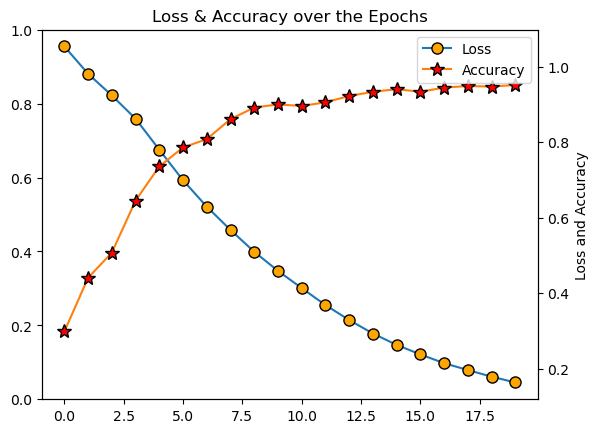

In [196]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.plot(trined_model.history['loss'], label='Loss', marker='o', mec='k', ms=8, mfc='orange')
ax2.plot(trined_model.history['accuracy'], label='Accuracy', marker='*', ms=10, mec='k', mfc='red')
#plt.grid()
plt.legend()
plt.ylabel("Loss and Accuracy")
plt.title("Loss & Accuracy over the Epochs")
plt.show()

In [197]:
Ytest=np.array(Ytest)

In [198]:
df1=pd.DataFrame({'original':Ytest,'predicted':np.argmax(predicted_values,axis=1)})

In [199]:
df1.head()

,original,predicted
0,2,2
1,1,1
2,0,0
3,1,1
4,0,0


In [200]:
print(df1[df1['original']!=df1['predicted']])

     original  predicted
5           2          0
11          2          0
93          2          1
94          2          0
109         2          0
121         2          0
131         2          0
141         2          0
147         2          0
172         2          0


In [201]:
%load_ext tensorboard
%tensorboard --logdir "C:/Users/kalag/OneDrive/Pictures/tensorboard/logdir"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1476), started 0:12:35 ago. (Use '!kill 1476' to kill it.)